In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 12)

In [3]:
#Importação dos dados de treino e de teste
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

# Criando o dataframe de resposta
answer = pd.DataFrame()

In [4]:
#Salvando os dados da features NU_INSCRICAO no dataframe de resposta
answer['NU_INSCRICAO'] = data_test['NU_INSCRICAO']

In [5]:
#Visualização dos dados de treino
data_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
#Todas as 167 colunas do dataframe de treino
columns_train = list(data_train.columns)
columns_train

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [7]:
#Visualização dos dados de teste
data_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [8]:
#Todas as colunas do dataframe de teste
columns_test = list(data_test.columns)
columns_test

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [9]:
#criar um dataframe de treino só com as colunas que existem no dataframe de teste e com a coluna IN_TREINEIRO (variável alvo)
train_new = pd.concat([data_train['IN_TREINEIRO'], data_train[columns_test]],axis=1)

In [10]:
#Vizualizando os dados faltantes em cada features
train_new.isna().sum()

IN_TREINEIRO                 0
NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_

In [11]:
#Analisar quais features possuem maior correlação com a feature alvo
train_new.corr()['IN_TREINEIRO'].sort_values(ascending=False)

IN_TREINEIRO              1.000000
TP_ST_CONCLUSAO           0.533983
TP_PRESENCA_CN            0.094692
TP_PRESENCA_CH            0.094692
TP_PRESENCA_MT            0.092454
TP_PRESENCA_LC            0.092454
TP_COR_RACA               0.009676
TP_STATUS_REDACAO         0.006688
IN_SABATISTA              0.003824
IN_DISLEXIA              -0.003297
IN_DISCALCULIA           -0.003297
IN_IDOSO                 -0.004663
IN_SURDEZ                -0.007374
NU_NOTA_COMP1            -0.008709
IN_GESTANTE              -0.011893
IN_BAIXA_VISAO           -0.013602
TP_NACIONALIDADE         -0.015179
NU_NOTA_COMP2            -0.023308
NU_NOTA_COMP5            -0.025811
NU_NOTA_COMP4            -0.025958
NU_NOTA_REDACAO          -0.026328
NU_NOTA_LC               -0.028261
NU_NOTA_COMP3            -0.030147
CO_UF_RESIDENCIA         -0.034944
TP_LINGUA                -0.036395
NU_NOTA_CN               -0.037874
NU_NOTA_CH               -0.053460
TP_ESCOLA                -0.244562
TP_ANO_CONCLUIU     

In [12]:
#features escolhidas para utilizar no modelo
train_new = train_new[['TP_ST_CONCLUSAO','TP_ESCOLA','NU_IDADE','IN_TREINEIRO']]
test_new = data_test[['TP_ST_CONCLUSAO','TP_ESCOLA','NU_IDADE']]

In [13]:
train_new.head()

,TP_ST_CONCLUSAO,TP_ESCOLA,NU_IDADE,IN_TREINEIRO
0,1,1,24,0
1,2,2,17,0
2,3,1,21,0
3,1,1,25,0
4,1,1,28,0


In [14]:
test_new.head()

,TP_ST_CONCLUSAO,TP_ESCOLA,NU_IDADE
0,1,1,19
1,1,1,24
2,3,1,16
3,2,2,17
4,1,1,19


# Análise da variável alvo


In [15]:
# Visualizando a distribuição das classes na variável alvo
data_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [16]:
#Visualizando que não possui nenhum dado faltante na variável alvo
data_train['IN_TREINEIRO'].isna().sum()

0

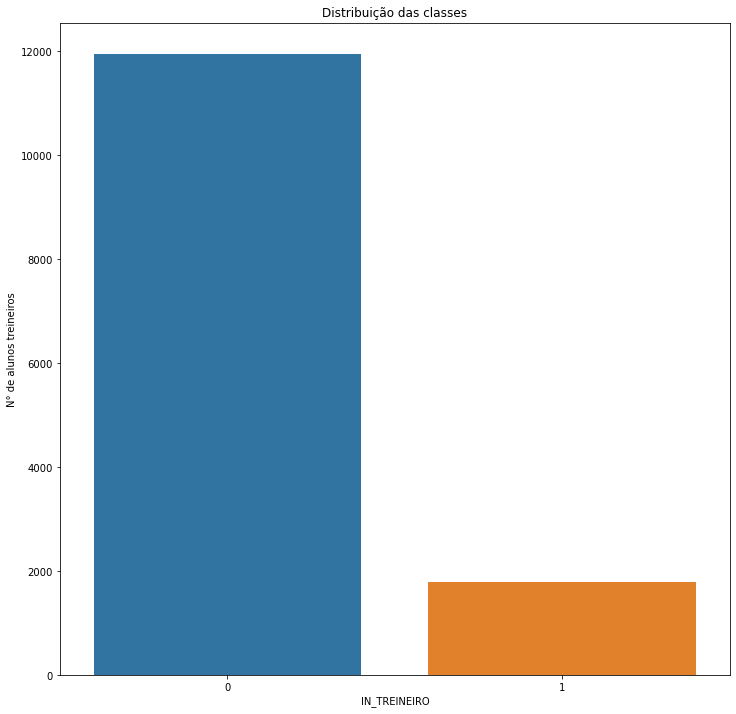

In [17]:
ax = sns.countplot(x='IN_TREINEIRO', data=train_new)
plt.ylabel('N° de alunos treineiros')
plt.title('Distribuição das classes');

É possível perceber que a variável alvo possui dados desbalanceados, ou seja, possui muitos exemplos da classe 0 em relação 
a classe 1. Isso representa um problema porque os classificadores aprendem que podem prever um dado como sendo da classe 
majoritária sempre, e ainda assim o classificador terá "bom desempenho". Esse problema será corrigido aqui usando o método
de SMOTE (Synthetic Minority Oversampling Technique). SMOTE é uma das técnicas mais populares de reamostragem em casos de 
classes desbalanceadas. Trata-se de uma técnica de oversampling que adiciona dados sintéticos à classe minitoritária através 
de uma heurística relativamente simples.

In [18]:
smote = SMOTE(sampling_strategy="minority")

In [19]:
#Uma série com todos os valores da variável alvo
target = train_new['IN_TREINEIRO']
target

0        0
1        0
2        0
3        0
4        0
        ..
13725    0
13726    0
13727    1
13728    0
13729    0
Name: IN_TREINEIRO, Length: 13730, dtype: int64

In [20]:
# Aplicando o SMOTE nos dados:
train, target = smote.fit_sample(train_new.iloc[:, :-1], target)

In [21]:
# Visualizando novamente a nova distribuição das classes:
np.bincount(target)

array([11947, 11947], dtype=int64)

In [22]:
target

0        0
1        0
2        0
3        0
4        0
        ..
23889    1
23890    1
23891    1
23892    1
23893    1
Name: IN_TREINEIRO, Length: 23894, dtype: int64

In [23]:
target = pd.DataFrame({'IN_TREINEIRO':target.values})
target

,IN_TREINEIRO
0,0
1,0
2,0
3,0
4,0
...,...
23889,1
23890,1
23891,1
23892,1


In [24]:
train

,TP_ST_CONCLUSAO,TP_ESCOLA,NU_IDADE
0,1,1,24
1,2,2,17
2,3,1,21
3,1,1,25
4,1,1,28
...,...,...,...
23889,3,1,15
23890,3,1,16
23891,3,1,17
23892,3,1,15


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train,target,test_size = 0.2,random_state=1)


In [26]:
x_train.shape

(19115, 3)

In [27]:
x_test.shape

(4779, 3)

In [28]:
#Para armazenar o score de cada modelo a ser aplicado a seguir 
#".score" retorna o coeficiente de determinação R ^ 2 da previsão.
score_list = []

In [29]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()

lr.fit(x_train,y_train.values.ravel ())#fit or train data

print('Logistic Regression Score : ',lr.score(x_test,y_test))#Ratio of correct predictions

score_list.append(lr.score(x_test,y_test))

Logistic Regression Score :  0.9889098137685708


In [30]:
lr.fit(train, target.values.ravel ())

lr_prediction = lr.predict(test_new)

In [31]:
lr_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train,y_train.values.ravel ())

print('K-Nearest Neighbors Score : ',knn.score(x_test,y_test))

score_list.append(knn.score(x_test,y_test))

K-Nearest Neighbors Score :  0.9891190625653903


In [33]:
knn.fit(train, target.values.ravel ())

knn_prediction = knn.predict(test_new)

In [34]:
knn_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [36]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(x_train,y_train.values.ravel ())

print('Super Vector Machine Score : ',svm.score(x_test,y_test))

score_list.append(svm.score(x_test,y_test))

Super Vector Machine Score :  0.9876543209876543


In [37]:
svm.fit(train, target.values.ravel ())

svm_prediction = svm.predict(test_new)

In [38]:
svm_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train.values.ravel ())

print('Naive Bayes Score : ',nb.score(x_test,y_test))

score_list.append(nb.score(x_test,y_test))

Naive Bayes Score :  0.9817953546767106


In [41]:
nb.fit(train,target.values.ravel ())

nb_prediction = nb.predict(test_new)

In [42]:
nb_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train.values.ravel ())

print('Decision Tree Score : ',dt.score(x_test,y_test))

score_list.append(dt.score(x_test,y_test))

Decision Tree Score :  0.9910023017367651


In [44]:
dt.fit(train,target.values.ravel ())

dt_prediction = dt.predict(test_new)

In [45]:
dt_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500)

rf.fit(x_train,y_train.values.ravel ())

print('Random Forest Score : ',rf.score(x_test,y_test))

score_list.append(rf.score(x_test,y_test))

Random Forest Score :  0.9910023017367651


In [49]:
rf.fit(train,target.values.ravel ())

rf_prediction = rf.predict(test_new)

In [50]:
rf_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

-

In [52]:
pr_dict = {'Logistic Regression' : lr_prediction,'KNN' : knn_prediction,'SVM' : svm_prediction,
           'Naive Bayes' : nb_prediction,'Decision Tree' : dt_prediction, 'Random Forest' : rf_prediction}

all_predictions = pd.DataFrame(pr_dict)

all_predictions.head(30)

,Logistic Regression,KNN,SVM,Naive Bayes,Decision Tree,Random Forest
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,1,1,1,1,1,1
7,0,0,0,0,0,0
8,1,1,1,1,1,1
9,0,0,0,0,0,0


In [53]:
final_prediction = [] #uma lista com as previsões da variavel alvo

#i : range columns , j : range rows

for i in all_predictions.values:
    sum_zero_score = 0 
    
    sum_one_score = 0 
    
    for j in range(5):
        if i[j]==0:
            sum_zero_score += score_list[j]
        else:
            sum_one_score += score_list[j]
    
    if sum_zero_score >= sum_one_score:
        final_prediction.append(0)
    else:
        final_prediction.append(1)

In [55]:
output = {'IN_TREINEIRO' : final_prediction}

submission = pd.DataFrame(output)

In [56]:
answer['IN_TREINEIRO'] = submission['IN_TREINEIRO']

In [57]:
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [60]:
answer.to_csv('answer.csv',index=False,header=True)